Notas de Estudo de "100 Aulas de Ciência de Dados" - Adriana Silva - ANS Rocks

https://www.youtube.com/playlist?list=PLmPBWkYA04fT39CBIkr5fVfwAKoGqQYy9

# Imports

In [1]:
import pandas as pd
import numpy as np
from IPython.display import HTML
from IPython.display import Image
import seaborn as sns
from matplotlib import pyplot as plt
# import random as rd
import random
from scipy import stats

import inflection

## Helper functions

In [2]:
#ajusta graficos
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

    #Retirar notação cientifica
    pd.set_option('display.float_format', lambda x: '%.4f' % x)
    pd.set_option('display.max_columns', None)


In [3]:
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\p0137852\projetos_tjmg\teste\venv_teste_2024\lib\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Teorema do Limite Central

In [4]:
# Suponha que você tem as seguintes médias amostrais
media_amostral_1 = 167
media_amostral_2 = 166
media_amostral_3 = 168
media_amostral_4 = 165
media_amostral_5 = 169
media_amostral_6 = 166
media_amostral_7 = 167
media_amostral_8 = 168
media_amostral_9 = 165
media_amostral_10 = 169
media_amostral_11 = 167
media_amostral_12 = 166
media_amostral_13 = 168
media_amostral_14 = 165
media_amostral_15 = 169
media_amostral_16 = 167

# Lista das médias amostrais
medias_amostrais = [
    media_amostral_1, media_amostral_2, media_amostral_3, media_amostral_4,
    media_amostral_5, media_amostral_6, media_amostral_7, media_amostral_8,
    media_amostral_9, media_amostral_10, media_amostral_11, media_amostral_12,
    media_amostral_13, media_amostral_14, media_amostral_15, media_amostral_16
]

# Calcular a média das médias amostrais
media_das_medias = np.mean(medias_amostrais)

# Calcular o desvio padrão das médias amostrais
desvio_padrao_das_medias = np.std(medias_amostrais, ddof=1)

# Calcular o erro padrão das médias amostrais
numero_de_amostras = len(medias_amostrais)
erro_padrao = desvio_padrao_das_medias / np.sqrt(numero_de_amostras)

print(f"Média das Médias Amostrais: {media_das_medias}")
print(f"Desvio Padrão das Médias Amostrais: {desvio_padrao_das_medias}")
print(f"Erro Padrão: {erro_padrao}")


Média das Médias Amostrais: 167.0
Desvio Padrão das Médias Amostrais: 1.4142135623730951
Erro Padrão: 0.3535533905932738


In [5]:
media_das_medias - erro_padrao

166.64644660940672

In [6]:
media_das_medias + erro_padrao

167.35355339059328

# Curva normal padrão

In [7]:
# stats.norm.pdf() Calcula a Função densidade de probabilidade - distribuição z
#     x      --> dominio 
#     .pdf() --> Probability density function
#     loc    --> valor central = 20 
#     scale  --> desvio padrao / erro padrao = 2

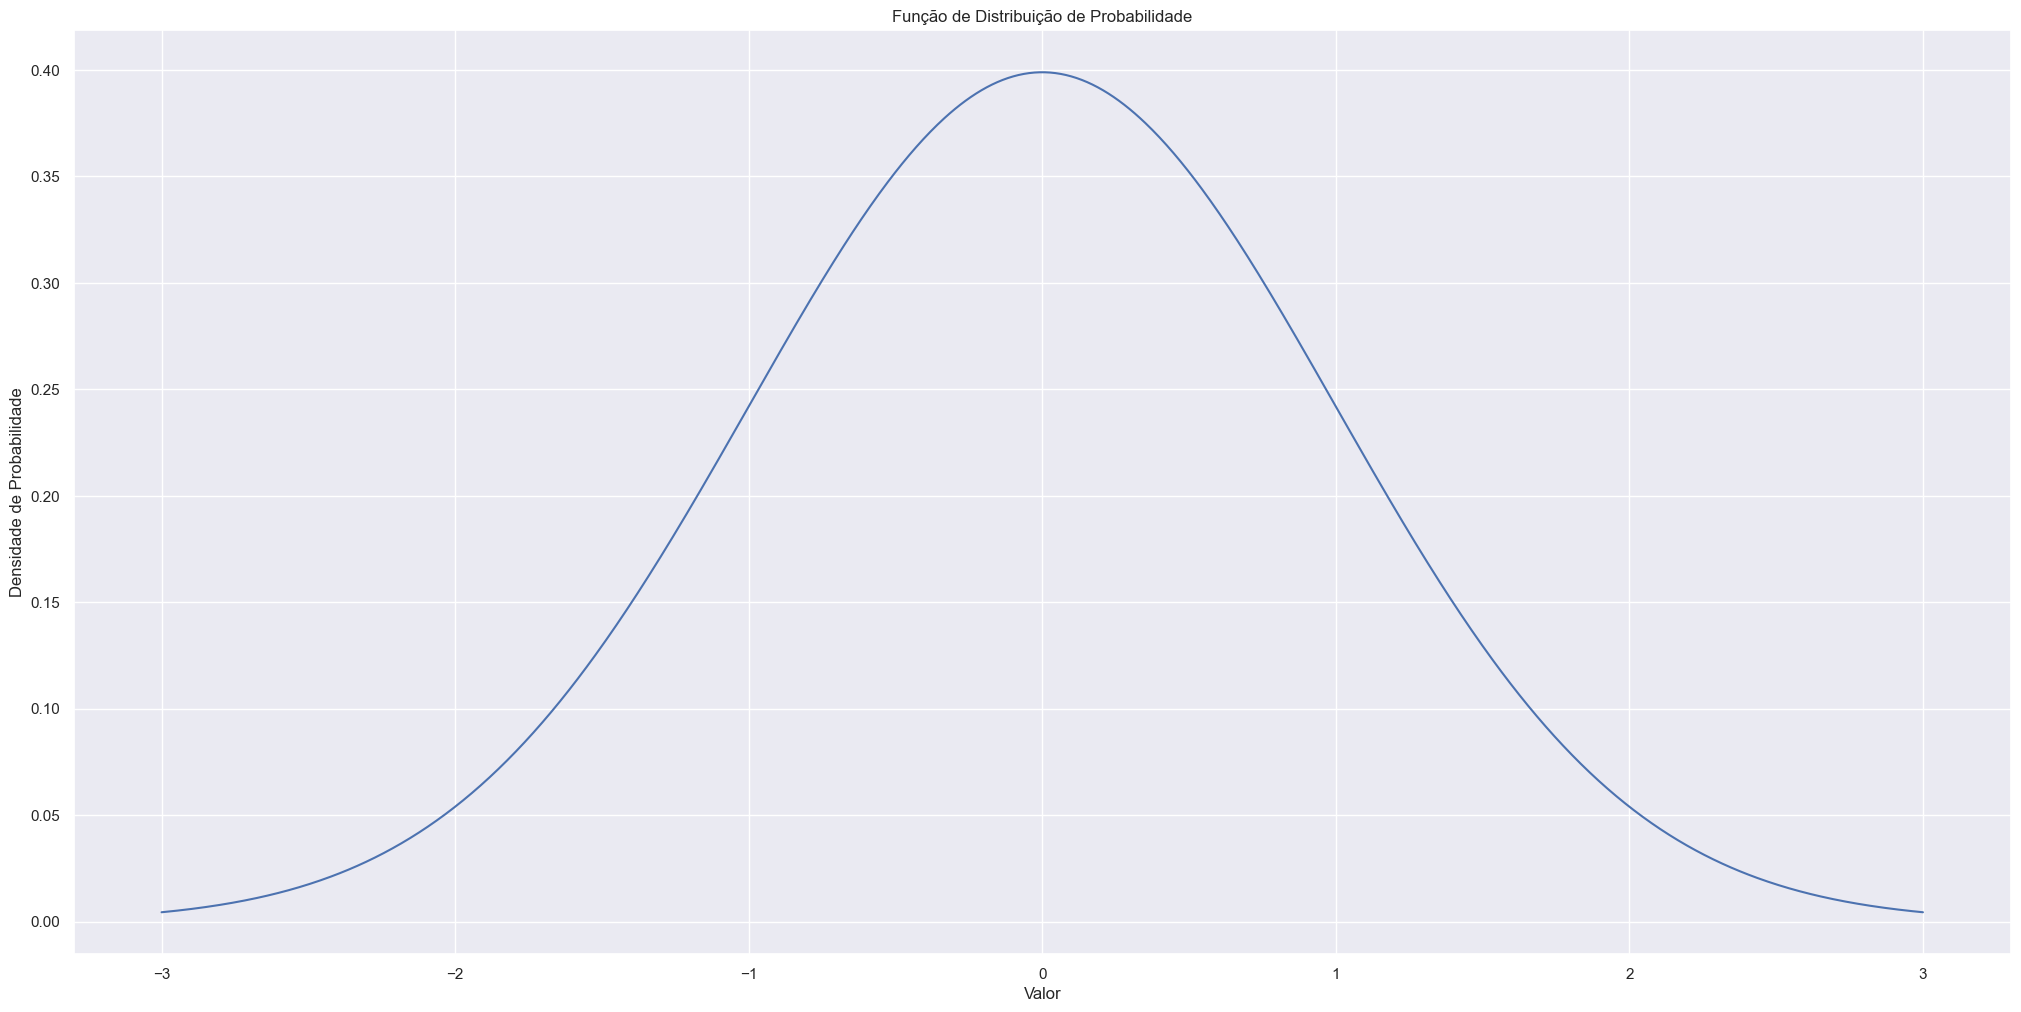

In [8]:
# Definir os parâmetros da distribuição normal
mean = 0
std_dev = 1

# Gerar os valores para o eixo x
x = np.linspace(mean - 3*std_dev, mean + 3*std_dev, 1000)

# Calcular a PDF para cada valor do eixo x
y = stats.norm.pdf(x, mean, std_dev)

# Plotar a PDF
plt.plot(x, y)
plt.title('Função de Distribuição de Probabilidade')
plt.xlabel('Valor')
plt.ylabel('Densidade de Probabilidade')
plt.grid(True)
plt.show()

## Exemplo Aula 17 

Uma máquina para encher pacotes de areia enche-os segundo uma distribuição Normal, com média $\mu$=20 kg e desvio padrão $\sigma$=2kg.

Periodicamente é selecionada uma amostra de 50 pacotes e é verificado se estamos colocando mais areia do que o necessário. 

Considere 99% de confiança.

$\bar{x}$ = 21.8

### Estabelecer as hipoteses nula e alternativa para o problema

**Ho: $\mu_{0}$ = 20**

**H1: $\mu_{1}$ >= 20**

Teste Unicaudal --> Como o teste é para verificar se a máquina está colocando MAIS areia que o necessário.

### Estratégia 1 Construir o intervalo entorno da média populacional $\mu$ = 20kg

**Calcular para a curva normal padrao quanto é o valor de 1% de cometer um erro do tipo I**

--> Método raiz --> consultar o valor na tabela da distribuição Z

--> Método numérico --> calcular com o python a Função densidade de probabilidade da distribuição z


In [9]:
# stats.norm.ppf(q, loc=0, scale=1) calcular o "percent point function" (ou quantil) de uma distribuição normal - distribuição z

#     .ppf   --> Percent point function (inverse of cdf — percentiles).
#     Em outras palavras, ela fornece o valor correspondente a uma determinada probabilidade cumulativa em uma distribuição normal padrão (com média 0 e desvio padrão 1).

#     q      --> Quantil desejado, ou seja, a probabilidade cumulativa para a qual você deseja encontrar o valor correspondente. 

#     loc    --> Média da distribuição normal (por padrão, 0 para uma distribuição normal padrão).

#     scale  --> Desvio padrão da distribuição normal (por padrão, 1 para uma distribuição normal padrão).


In [10]:
# Intervalo de confiança de 99%
IC = 0.99

# nivel de significancia
alpha = 0.01

# valor z padrão para o nível crítico alpha --> cauda positiva --> Consultar a "tabela"
cauda = stats.norm.ppf(1 - alpha)
cauda

2.3263478740408408

**Precisa levar o valor z --> 2.3263 para a proporção de área em na curva com a média populacional**

# z = $ \frac{ \bar{x} - \mu_{0} } {\frac{\sigma}{\sqrt{n}}} \$ --> 

# $\bar{x}$ = $\mu_{0}$ + z * $\frac{\sigma}{\sqrt{n}}$

In [11]:
# método raiz calculo x_barra
z  = cauda
mi = 20
desvio_padrao = 2
n = 50
erro_padrao = (desvio_padrao / np.sqrt(n))

x_barra = mi + ( z * (erro_padrao ) )
x_barra 

20.657990542853273

In [12]:
# metodo numerico scipy
x_barra_python = stats.norm.ppf((1 - alpha), loc=20, scale=erro_padrao)
x_barra_python

20.657990542853273

**$\bar{x}$ > 20 --> $\bar{x}$ maior que a média populacional --> cauda superior**

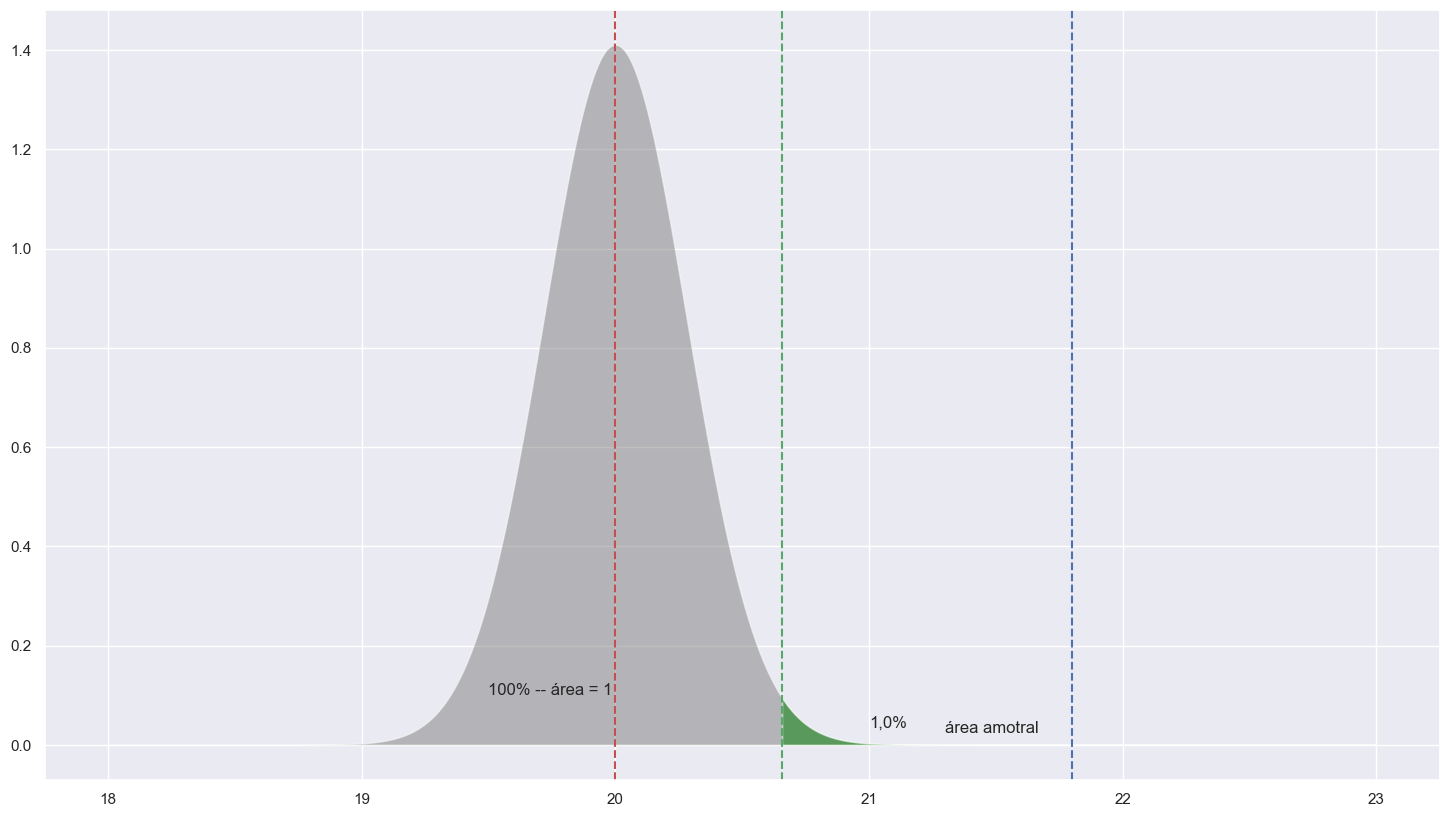

In [13]:
plt.figure( figsize = (18,10) )

# Definir a curva normal para média 20 e desvio padrao = erro padrao calculado
domain = np.linspace( 18,23,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain,  loc = 20, scale = erro_padrao),
                  facecolor = 'gray', alpha = 0.5 );
plt.text( x= 19.5, y= 0.10, s = "100% -- área = 1");
plt.axvline( x = 20, color = 'r', linestyle = '--');

# plot da área de 1% --> cauda positiva --> x_barra até limite superior do grafico da curva --> 20.65 corresponde a 2,3265 da curva normal padrao
domain = np.linspace( x_barra, 23, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain, loc = 20, scale =erro_padrao),
                  facecolor = 'green', alpha = 0.5 );

# linha vertical da cauda
plt.axvline( x = x_barra, color = 'g', linestyle = '--');
plt.text( x=  21.0, y= 0.035, s = "1,0%");

# linha vertical da Média amostral de 21.8
plt.axvline( x = 21.8, color = 'b', linestyle = '--');
plt.text( x=  21.3, y= 0.025, s = "área amotral");
plt.grid(True)

In [14]:
# calculo do p-valor correspondente ao x_barra = 20.6579 --> nivel de significancia = 1% da curva com media 20 e desvio padrao igual ao erro padrao
p_valor = 1 - stats.norm.cdf( x = x_barra,  loc = 20, scale = erro_padrao )
p_valor

0.01000000000000012

**Ho: $\mu_{0}$ = 20**

**H1: $\mu_{1}$ >= 20**

Teste Unicaudal --> Como o teste é para verificar se a máquina está colocando MAIS areia que o necessário.

<font color = 'blue'>**$\bar{x}$ do problema > $\bar{x}$ crítico da curva com média 20**</f>

**21.8 > 20.65**

--> 20.65 corresponde a 2,3265 da curva normal padrao para $\alpha$ 1%

<font color = 'red'>**Região crítica --> Rejeito hipótese que a média amostral tem média igual a média populacional.**</f>

### Estratégia 2 Construir o intervalo entorno da média amostral $\bar{x}$ =  21,8kg

In [15]:
# Intervalo de confiança de 99%
IC = 0.99

# nivel de significancia
alpha = 0.01

# valor z padrão para o nível crítico alpha --> cauda positiva
cauda = stats.norm.ppf(1 - alpha)
cauda

2.3263478740408408

**Precisa levar o valor z --> 2.3263 para a proporção de área na curva com a média amostral**

# z = $ \frac{ \bar{x} - \mu_{0} } {\frac{\sigma}{\sqrt{n}}} \$ --> 

**Calcular $\mu_{0}$  correspondente a  2.33 da curva normal padrao**

# $\mu_{0}$ = $\bar{x}$ - z * $\frac{\sigma}{\sqrt{n}}$

In [16]:
z  = cauda
x_barra = 21.8
desvio_padrao = 2
n = 50
erro_padrao = (desvio_padrao / np.sqrt(n))

# 
mi = x_barra - ( z * (desvio_padrao / np.sqrt(n) ) )
mi  
 

21.142009457146727

In [17]:
# limite superior
mi2 = x_barra + ( z * (desvio_padrao / np.sqrt(n) ) )
mi2 

22.457990542853274

In [18]:
# metodo numerico scipy
mi_python = stats.norm.ppf((alpha), loc=21.80, scale=erro_padrao)
mi_python

21.142009457146727

**$\mu_{0}$ < 21.8 --> $\mu_{0}$ menor que a média amostral --> cauda inferior**

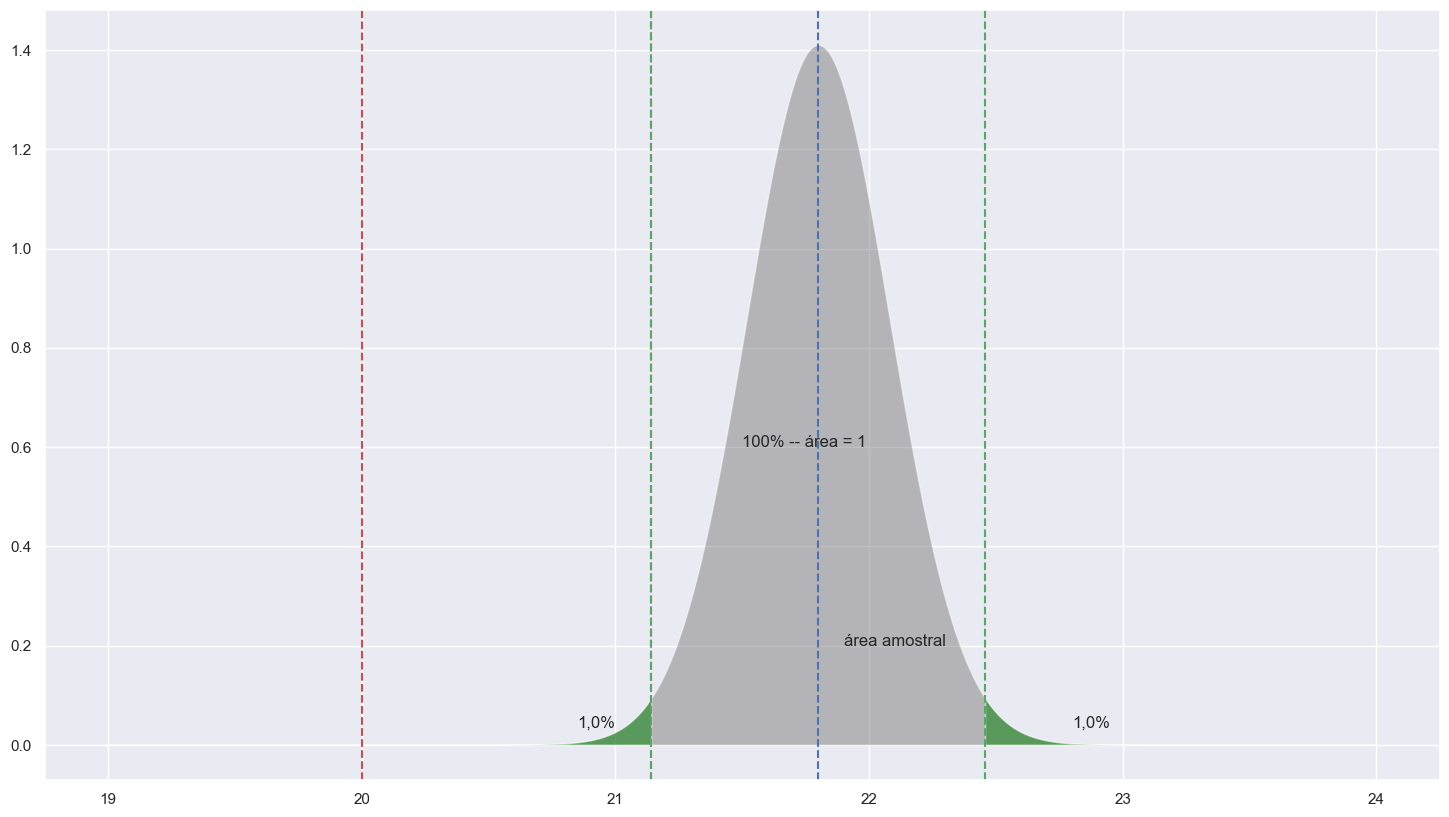

In [19]:
plt.figure( figsize = (18,10) )

# Definir a curva normal para média = 21.80 e desvio padrao = erro padrao calculado
domain = np.linspace( 19,24,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain,  loc = 21.8, scale = erro_padrao ),
                  facecolor = 'gray', alpha = 0.5 );
plt.text( x= 21.5, y= 0.60, s = "100% -- área = 1");
plt.axvline( x = 21.14, color = 'r', linestyle = '--');

# plot da área de 1% --> cauda negativa --> mi até limite inferior do grafico da curva --> 21.1420 corresponde a 2,3265 da curva normal padrao
domain = np.linspace( 19, mi, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain, loc = 21.8, scale = erro_padrao),
                  facecolor = 'green', alpha = 0.5 );

# plot da área de 1% --> cauda negativa --> mi até limite inferior do grafico da curva --> 21.1420 corresponde a 2,3265 da curva normal padrao
domain = np.linspace( mi2, 24, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain, loc = 21.8, scale = erro_padrao),
                  facecolor = 'green', alpha = 0.5 );

# Linha vertical da cauda
plt.axvline( x = mi, color = 'g', linestyle = '--');
plt.text( x=  20.85, y= 0.035, s = "1,0%");

# Linha vertical da cauda
plt.axvline( x = mi2, color = 'g', linestyle = '--');
plt.text( x=  22.8, y= 0.035, s = "1,0%");

# Linha vertical Média amostral de 21.8
plt.axvline( x = 21.8, color = 'b', linestyle = '--');
#plt.text( x=  21.5, y= 0.025, s = "área amotral");

# Linha vertical da Média populacional de 20
plt.axvline( x = 20, color = 'r', linestyle = '--');
plt.text( x=  21.9, y= 0.2, s = "área amostral");

In [20]:
# calculo do p-valor correspondente ao mi = 21.14 --> nivel de significancia = 1% da curva com media = media amostral e desvio = erro padrao
p_valor = stats.norm.cdf( x = mi,  loc = 21.8, scale = erro_padrao )
p_valor

0.010000000000000136

**Ho: $\mu_{0}$ = 20**

**H1: $\mu_{1}$ >= 20**

Teste Unicaudal --> Como o teste é para verificar se a máquina está colocando MAIS areia que o necessário.

<font color = 'blue'>**$\mu_{0}$ do problema > média populacional**</f>

**21.14 > 20**

--> 21.14 corresponde a -2,3265 da curva normal padrao para $\alpha$ 1%

<font color = 'red'>**Região crítica --> Rejeito hipótese que a média amostral tem média igual a média populacional.**</f>

### Estratégia 3 Construir o intervalo entorno da curva Z com média 0

**Calcular para a curva normal padrao quanto é o valor de 1% de cometer um erro do tipo I**

--> Método raiz --> consultar o valor na tabela da distribuição Z

--> Método numérico --> calcular com o python a Função densidade de probabilidade da distribuição z

In [21]:
# Intervalo de confiança de 99%
IC = 0.99

# nivel de significancia
alpha = 0.01

# valor z padrão para o nível crítico alpha
cauda = stats.norm.ppf(1 - alpha)
print( 'Valor Z para alpha = 1% : {}'.format(cauda))

Valor Z para alpha = 1% : 2.3263478740408408


**Calcular o valor Z com os dados do problema**

# z = $ \frac{ \bar{x} - \mu_{0} } {\frac{\sigma}{\sqrt{n}}} \$

z --> valor calculado proporção equivalente para o problema

$\bar{x}$ --> média amostral

$\mu_{0}$ --> média populacional

$\sigma$ --> desvio padrão populacional

n --> número de elementos da amostra

In [22]:
# dados problema
x_bar = 21.8
mi = 20
desvio = 2
n = 50

# calculo de z
z = (x_bar-mi) / ( desvio/np.sqrt(50) )
print('Valor z calculado do problema: {} '.format(z) )

Valor z calculado do problema: 6.36396103067893 


**Comparar as estatísticas --> Comparar valor Z do problema com o valor Z da curva normal padrão com 1% de significancia**

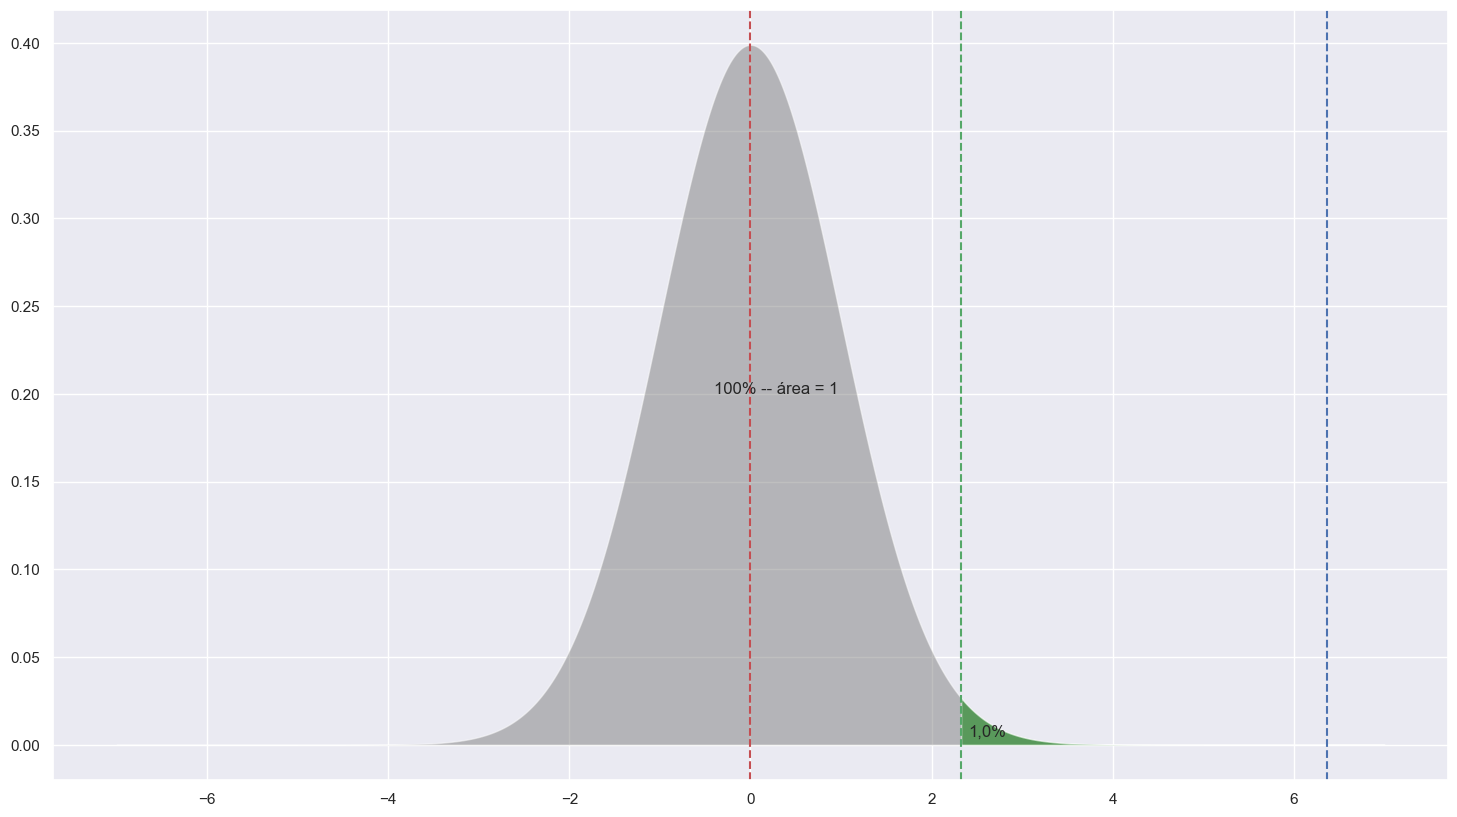

In [23]:
plt.figure( figsize = (18,10) )

# plot da área de 100% da curva Z centrada em zero e com desvio padrão igual a 1 
domain = np.linspace( -7,7,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain,  loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

# plot da área de 1% --> cauda --> 2.3263 até limite superior do grafico da curva --> 5
domain = np.linspace( cauda, 7, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain, loc = 0, scale = 1),
                  facecolor = 'green', alpha = 0.5 );

# plot da área do valor z calculado para o problema
domain = np.linspace( z, 7, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain, loc = 0, scale = 1),
                  facecolor = 'blue', alpha = 0.5 );

# media zero
plt.text( x= -0.4, y= 0.20, s = "100% -- área = 1");
plt.axvline( x = 0, color = 'r', linestyle = '--');

# cauda
plt.axvline( x = cauda, color = 'g', linestyle = '--');
plt.text( x=  2.4, y= 0.005, s = "1,0%");

plt.axvline( x = z, color = 'b', linestyle = '--');

**Ho: $\mu_{0}$ = 20**

**H1: $\mu_{1}$ >= 20**

Teste Unicaudal --> Como o teste é para verificar se a máquina está colocando MAIS areia que o necessário.

<font color = 'blue'>**Valor Z calculado do problema > Valor Z para $\alpha$ 1% da curva padrão**</f>

**6.36 > 2.32**

<font color = 'red'>**Região crítica --> Rejeito hipótese que a média amostral tem média igual a média populacional.**</f>

### Estratégia 4 Calcular  p-valor e comparar com nível crítico definido

Calcular a probabilidade de cometer o Erro  tipo I --> calcular p-valor para $\bar{x}$

In [24]:
# dados problema
x_bar = 21.8
mi = 20
desvio = 2
n = 50

# calculo de z
z = (x_bar-mi) / ( desvio/np.sqrt(50) )
print('Valor z calculado do problema: {} '.format(z) )

Valor z calculado do problema: 6.36396103067893 


In [25]:
# calculo da probabilidade correspondente a z = 6.3639
# Cauda Positiva
p_valor = 1 - stats.norm.cdf( x = z,  loc = 0, scale = 1 )
p_valor

9.830802838450836e-11

In [26]:
Valor_critico = 0.01

Valor_critico > p_valor

True

**Ho: $\mu_{0}$ = 20**

**H1: $\mu_{1}$ >= 20**

Teste Unicaudal --> Como o teste é para verificar se a máquina está colocando MAIS areia que o necessário.

<font color = 'blue'>**Probabilidade de cometer o erro tipo I =  9.830802838450836e-11**</f>

<font color = 'green'>**Nível de significancia do problema --> $\alpha$ 1% = 0.01 da curva padrão**</f>

<font color = 'green'>**Tolero no máximo 1% de Erro Tipo I --> Falar que um evento aconteceu sendo que ele não aconteceu**</f>

**0.01 > 9.830802838450836e-11**

<font color = 'red'>**A probabilidade de cometer um erro tipo I do problema é maior que 1% --> Rejeito hipótese que a média amostral tem média igual a média populacional.**</f>

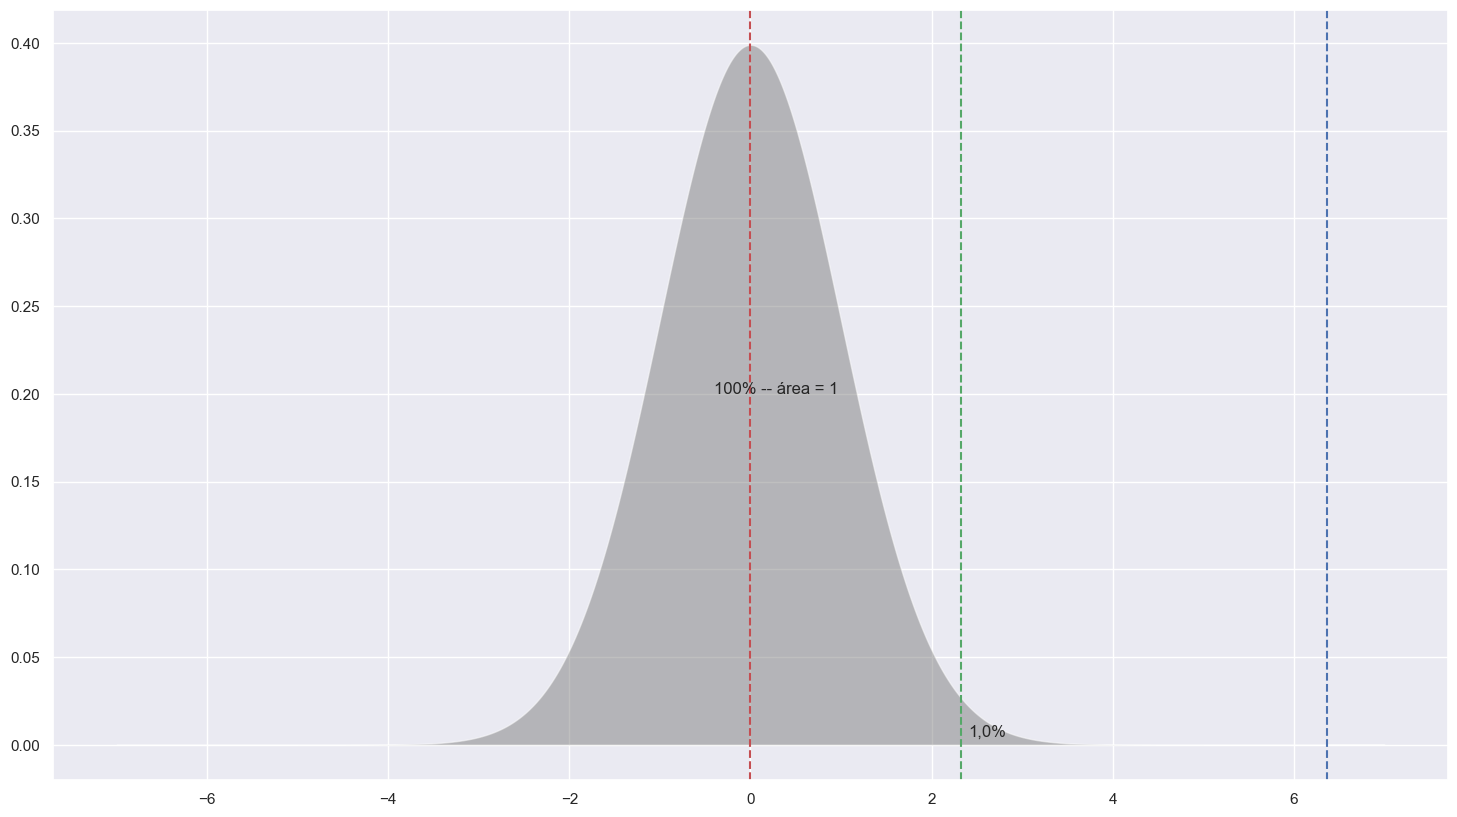

In [27]:
plt.figure( figsize = (18,10) )

# plot da área de 100% da curva Z centrada em zero e com desvio padrão igual a 1 
domain = np.linspace( -7,7,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain,  loc = 0, scale = 1),
                  facecolor = 'gray', alpha = 0.5 );

# # plot da área de 1% --> cauda --> 2.3263 até limite superior do grafico da curva --> 5
# domain = np.linspace( cauda, 7, 1000 )
# plt.fill_between( x = domain, 
#                   y1 = stats.norm.pdf(domain, loc = 0, scale = 1),
#                   facecolor = 'green', alpha = 0.5 );

# plot da área do valor z calculado para o problema
domain = np.linspace( z, 7, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.norm.pdf(domain, loc = 0, scale = 1),
                  facecolor = 'blue', alpha = 0.5 );

# media zero
plt.text( x= -0.4, y= 0.20, s = "100% -- área = 1");
plt.axvline( x = 0, color = 'r', linestyle = '--');

# alpha
plt.axvline( x = cauda, color = 'g', linestyle = '--');
plt.text( x=  2.4, y= 0.005, s = "1,0%");

# p-valor
plt.axvline( x = z, color = 'b', linestyle = '--');

# Teste t

Um gerente deseja saber se, em média, seus clientes gastam $R\$ 500,00$ ou um valor menor que $R\$ 500,00$. 

Para se testar a hipótese de interesse o gerente retirou uma amostra de 31 clientes e obteve:

$\bar{x}$ = R\$ 497,00 

S = R\$ 15,00

Considere 95 % de confiança. 

Hipótese do teste

**Ho: $\mu_{0}$ = 500**

**H1: $\mu_{1}$ < 500**

### Estratégia 1 Construir o intervalo entorno da média populacional a ser investigada $\mu$ = R$500,00

Não conheço os dados da população --> Teste t é o adequado para esses casos

**Calcular para a curva normal padrao quanto é o valor de 5% de cometer um erro do tipo I**

--> Método raiz --> consultar o valor na tabela da distribuição t

--> Método numérico --> calcular com o python a Função densidade de probabilidade da distribuição t


**Calcular para a curva t padrao quanto é o valor de 5% de cometer um erro do tipo I**

--> Método raiz --> consultar o valor na tabela da distribuição t

--> Método numérico --> calcular com o python a Função densidade de probabilidade da distribuição t

In [28]:
# stats.t.ppf() - calcula o valor t de acordo com nível de significancia escolhido.
#     .ppf --> Percent point function (inverse of cdf — percentiles).
#     q    --> quantile - nível de significancia desejado
#     df   --> graus de liberdade 

In [29]:
# Intervalo de confiança de 99%
IC = 0.95

# nivel de significancia
alpha = 0.05

# valor t padrão para o nível crítico alpha
cauda = stats.t.ppf(q = alpha,  df = 30 )
print( 'Valor t para alpha = 1% : {}'.format(cauda))

Valor t para alpha = 1% : -1.6972608943617384


**Calcular o valor t com os dados do problema**

# t = $ \frac{ \bar{x} - \mu_{0} } {\frac{S}{\sqrt{n}}} \$

t --> valor calculado proporção equivalente para o problema

$\bar{x}$ --> média amostral

$\mu_{0}$ --> média populacional a ser investigada

S --> Erro padrão amostral

n --> número de elementos da amostra

**Calcular $\bar{x}$  correspondente a -1,6972 da curva t padrao**

# $\bar{x}$ = $\mu_{0}$ + t * $\frac{S}{\sqrt{n}}$

In [30]:
# dados problema
mi = 500
t = cauda
s = 15
n = 31
erro_padrao = ( s / np.sqrt(31))
# calculo de z
x_bar = mi + t * ( s / np.sqrt(31) )
print('Valor x barra calculado do problema: {} '.format(x_bar) )

Valor x barra calculado do problema: 495.4274441667489 


**Comparar as estatísticas --> Comparar valor t do problema com o valor t da curva t padrão com 5% de significancia**

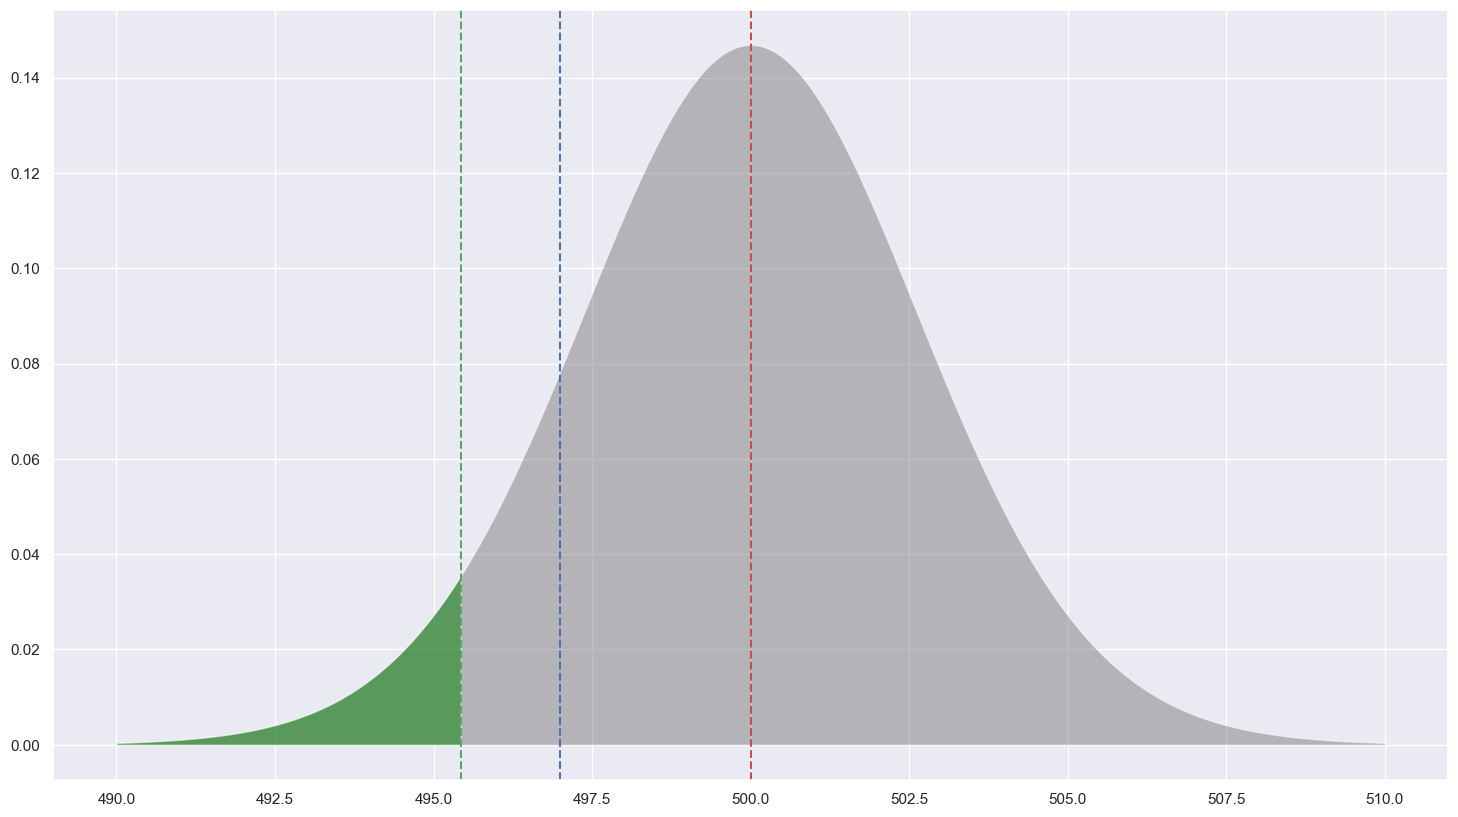

In [31]:
plt.figure( figsize = (18,10) )

# plot da área de 100% da curva Z centrada em zero e com desvio padrão igual a 1 
domain = np.linspace( 490,510,1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain,  loc = 500, scale = erro_padrao, df = 31),
                  facecolor = 'gray', alpha = 0.5 );

# plot da área de 1% --> cauda --> 2.3263 até limite superior do grafico da curva --> 5
domain = np.linspace( 490, x_bar, 1000 )
plt.fill_between( x = domain, 
                  y1 = stats.t.pdf(domain, loc = 500, scale = erro_padrao, df = 31),
                  facecolor = 'green', alpha = 0.5 );

# media amostral
#plt.text( x= -0.4, y= 0.20, s = "100% -- área = 1");
plt.axvline( x = 497, color = 'b', linestyle = '--');

# media x 
#plt.text( x= -0.4, y= 0.20, s = "100% -- área = 1");
plt.axvline( x = 500, color = 'r', linestyle = '--');

# cauda
plt.axvline( x = x_bar, color = 'g', linestyle = '--');
#plt.text( x=  2.4, y= 0.005, s = "1,0%");

# plt.axvline( x = z, color = 'b', linestyle = '--');

**Ho: $\mu_{0}$ = 500**

**H1: $\mu_{1}$ < 500**

Teste Unicaudal --> Como o teste é para verificar se os clientes gastam MENOS que o valor de 500 reais.

<font color = 'blue'>**$\bar{x}$ do problema > $\bar{x}$ crítico da curva centrada em 500**</f>

**497 > 495.4274**

--> 495.4274 corresponde a -1.6972608943617384 da curva normal padrao para $\alpha$ 5%

<font color = 'red'>**Fora da Região crítica --> Não Rejeito hipótese que o valor de 497 é menor que 500 do teste.**</f>

### Estratégia 2 Calcular  p-valor e comparar com nível crítico definido

Calcular a probabilidade de cometer o Erro  tipo I --> calcular p-valor para $\bar{x}$

**Calcular valor da estatística t**

# t = $ \frac{ \bar{x} - \mu_{0} } {\frac{S}{\sqrt{n}}} \$

In [32]:
# dados problema

# média amostral
x_bar = 497

# média do problema
mi = 500

# desvio amostral
s = 15

# número de elementos da amostra
n = 31
erro_padrao = ( s / np.sqrt(31))

# calculo de t
t = (x_bar - mi) / erro_padrao

print('Valor t calculado do problema: {} '.format(t) )

Valor t calculado do problema: -1.1135528725660042 


In [33]:
# cauda negativa
p_valor = stats.t.cdf( x = t, df = 30, loc = 0, scale = 1 )
p_valor

0.13715692316310063

**Ho: $\mu_{0}$ = 500**

**H1: $\mu_{1}$ < 500**

Teste Unicaudal --> Como o teste é para verificar se os clientes gastam MENOS que o valor de 500 reais.

<font color = 'blue'>**Probabilidade de cometer o erro tipo I = 0.13715692316310063**</f>

<font color = 'green'>**Nível de significancia do problema --> $\alpha$ 5% = 0.05 da curva padrão**</f>

<font color = 'green'>**Tolero no máximo 5% de Erro Tipo I --> Falar que um evento aconteceu sendo que ele não aconteceu**</f>

**0.13715692316310063 > 0.05**

<font color = 'red'>**A probabilidade de cometer um erro tipo I do problema é maior que 5% --> Não Rejeito Ho**</f>

<font color = 'red'>**Não rejeito a hipótese que a média da população pode ter valor igual a R$500,00**</f>

# Aula 20 Como fazer um teste paramétrico no Python

## Testes de Normalidade

<font color = 'green'>**Conhecidos como teste de aderência. Existem vários, conhecemos o:**</f>
    
*  Teste de Kolmogovov - Smirnov (KS) --> Usado quando n > 30
 
    H0: a amostra é normal

    H1: a amostra não é normal

* Teste de Shapiro Wilks --> Usado quando 4 <= n <= 2000

    H0: a amostra é normal

    H1: a amostra não é normal

### Exemplo 1 

<font color = 'red'>**Exemplo**</f>

Criamos uma variável aletória chamada x, conforme uma distribuição normal e outra com distribuição uniforme apenas para ver como funciona o chamado teste de normalidade.


#### Distribuições criadas

In [34]:
# criando o objeto x que é a nossa variável aleatória gerada conforme uma distribuição normal com 1 mil observações
x = np.random.normal(size=1000)

In [35]:
x[:10]

array([-0.53483825,  0.49817983, -1.16557544,  0.10498451,  0.57594993,
       -2.01481583, -1.32979967, -0.57701621,  0.53294612, -1.16410705])

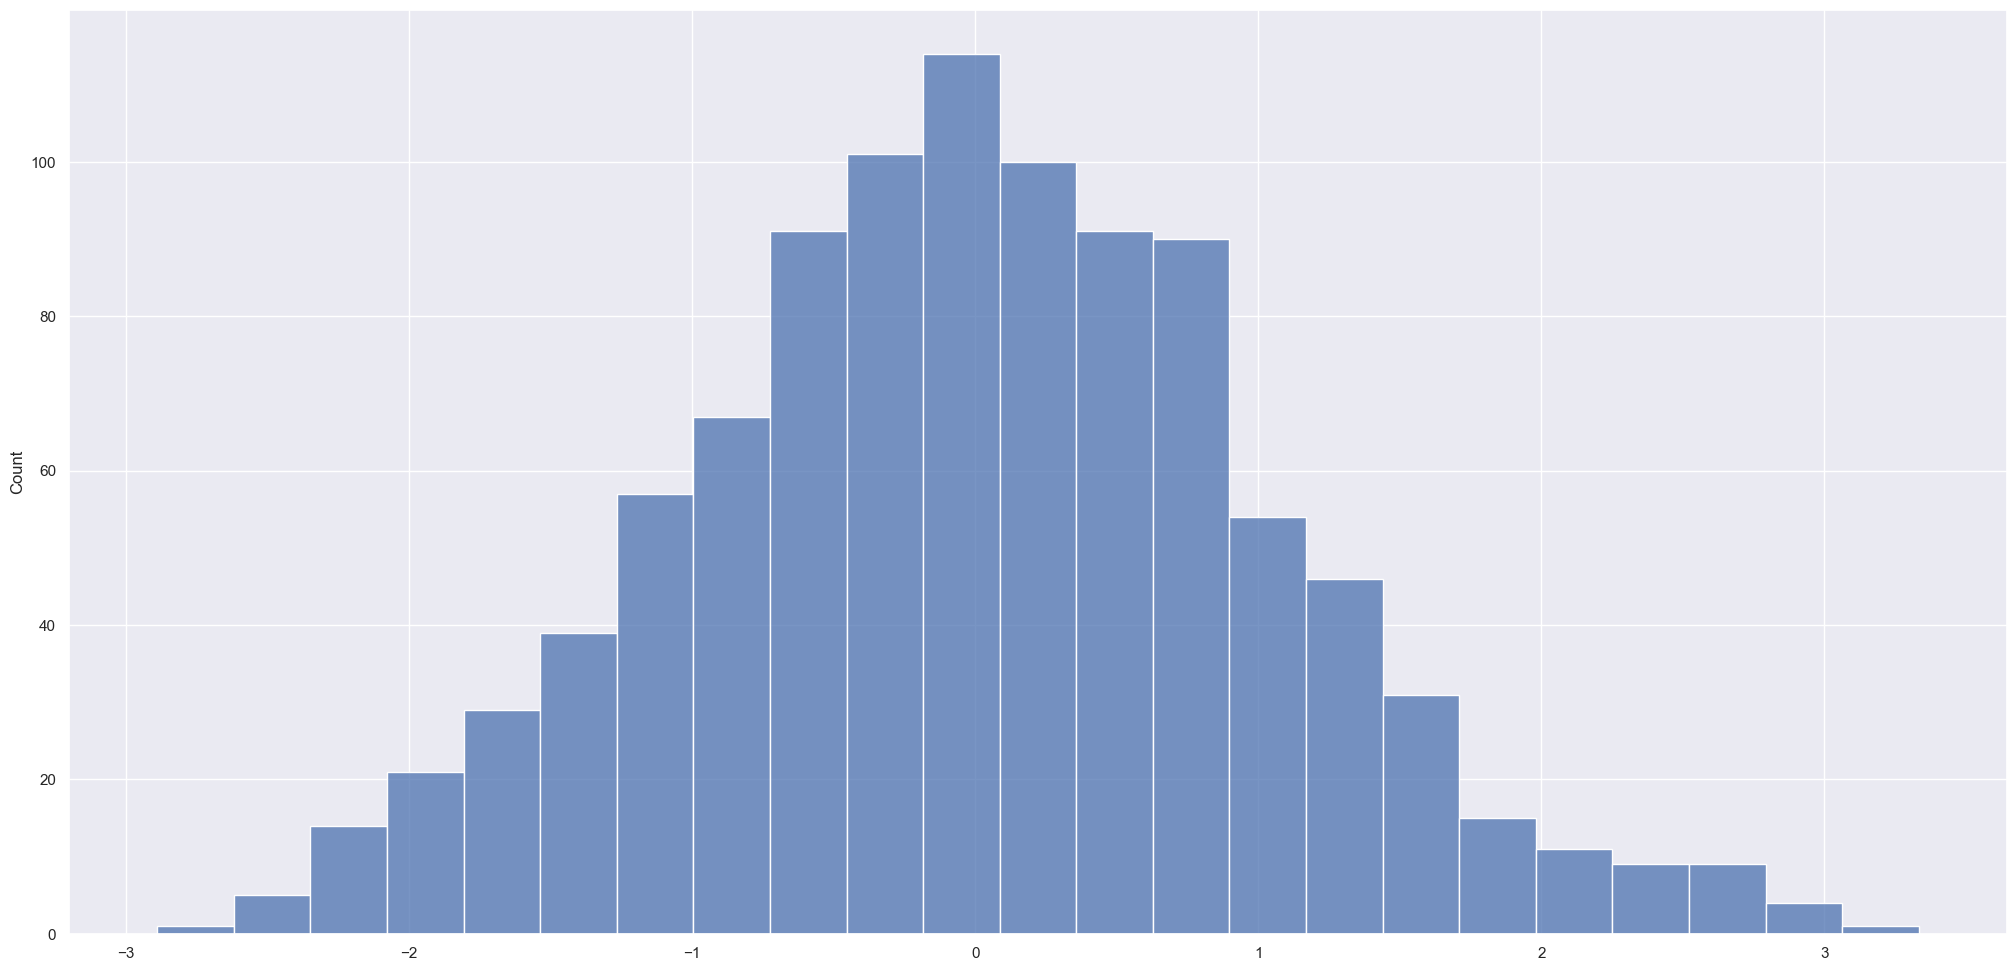

In [36]:
sns.histplot(data = x);

In [37]:
# criando o objeto w que é a nossa variável aleatória gerada conforme uma distribuição uniforme com 2300 mil observações
w = np.random.uniform(size=2300)

In [38]:
w[:10]

array([0.23587967, 0.39693028, 0.914939  , 0.8694558 , 0.69919844,
       0.25887075, 0.73485599, 0.00744128, 0.21563289, 0.49154708])

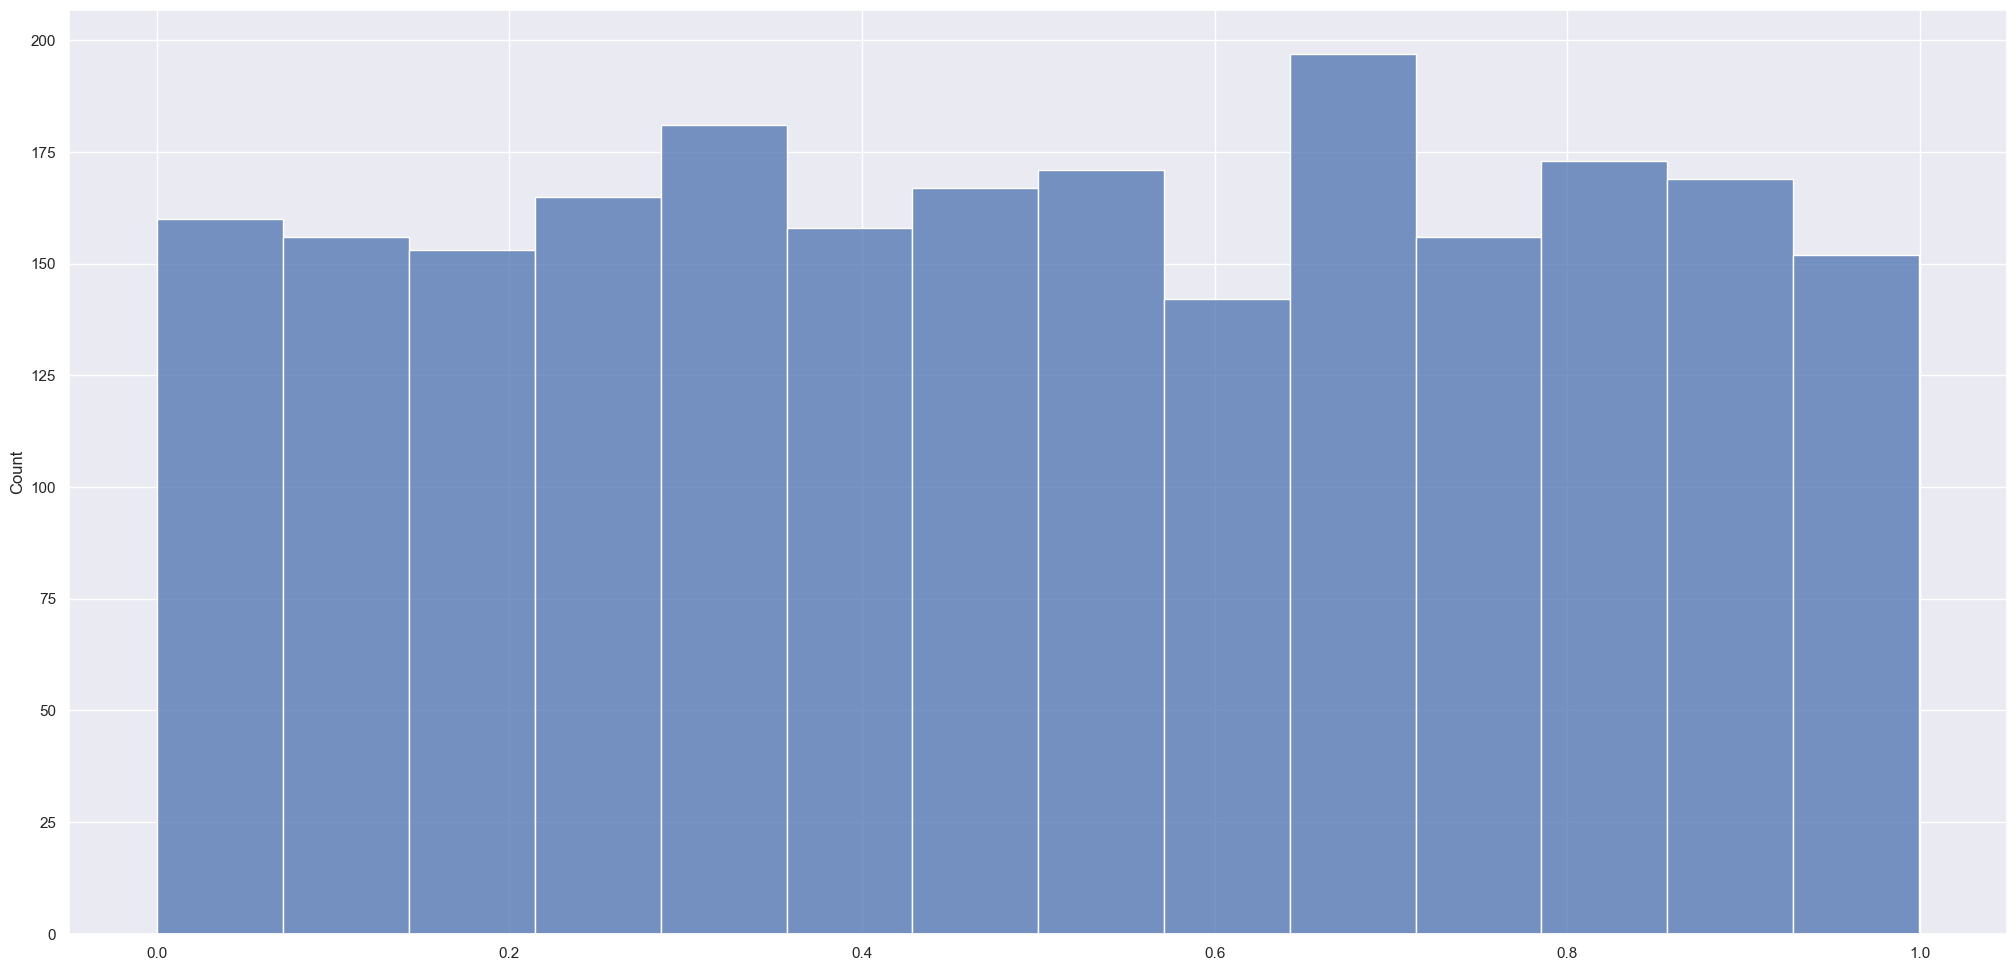

In [39]:
sns.histplot(data = w);

#### 1 Teste de Kolmogorov - Smirnov (ks)

*  Teste de Kolmogovov - Smirnov (KS) --> **Usado quando n > 30**
 
    H0: a amostra é normal

    H1: a amostra não é normal

##### 1.1 Teste de Kolmogorov - Smirnov (ks) - distribuição normal

In [40]:
# Teste Kolmogovov - Smirnov (KS) biblioteca scipy
stats.kstest(x,'norm')

KstestResult(statistic=0.014475821161251234, pvalue=0.9828968500126561, statistic_location=-0.10919432968019559, statistic_sign=1)

In [41]:
# Realizando o teste KS
statistic, p_value = stats.kstest(x, 'norm')

In [42]:
# Interpretação
if p_value < 0.05:
    print("\033[94mRejeitamos a hipótese nula. A amostra não segue uma distribuição normal.")
else:
    print("\033[94mNão rejeitamos a hipótese nula. --> A amostra pode seguir uma distribuição normal.")

Não rejeitamos a hipótese nula. --> A amostra pode seguir uma distribuição normal.


**Detalhes do funcionamento do teste**

O teste Kolmogorov-Smirnov (KS) é um teste estatístico não paramétrico usado para comparar uma amostra com uma distribuição teórica ou para comparar duas amostras. 

Quando você usa o stats.kstest do SciPy com uma distribuição normal teórica, o objetivo é verificar se a amostra x segue uma distribuição normal.

<font color = 'blue'>**Parâmetros**</f>

**x:** A amostra de dados que você deseja testar.

**'norm':** Especifica que a distribuição teórica é a distribuição normal padrão (com média 0 e desvio padrão 1).

<font color = 'blue'>**Retorno da Função**</f>

O método stats.kstest retorna dois valores:

**Statistic:** O valor estatístico do teste KS, que é a distância máxima entre a função de distribuição empírica da amostra x e a função de distribuição acumulada (CDF) da distribuição de referência.

**p-value:** O valor-p associado ao teste, que indica a probabilidade de observar uma distância tão extrema (ou mais extrema) quanto a observada, assumindo que a amostra segue a distribuição teórica especificada.

<font color = 'blue'>**Interpretação dos Resultados**</f>

**Statistic:** Um valor maior da estatística do teste indica uma maior diferença entre a amostra e a distribuição teórica. No entanto, não há um valor de corte específico para o estatístico; a decisão de rejeitar ou não a hipótese nula baseia-se no valor-p.

**p-value:** 

    --> Se o p-value for pequeno (por exemplo, menor que 0.05): 
    
        Rejeitamos a hipótese nula de que a amostra segue a distribuição normal. 
    
        Isso sugere que há uma evidência estatística significativa de que a amostra não segue uma distribuição normal.

    --> Se o p-value for grande (por exemplo, maior que 0.05): 
    
        Não rejeitamos a hipótese nula. 

        Isso sugere que não há evidência estatística suficiente para concluir que a amostra não segue uma distribuição normal. 

        No entanto, isso não prova que a amostra segue uma distribuição normal; 
        
        apenas indica que a amostra é consistente com uma distribuição normal.

<font color = 'blue'>**Considerações Importantes**</f>

    --> Distribuição Normal Padrão: 

        Quando você usa 'norm' como a distribuição teórica, o kstest assume uma distribuição normal padrão (média 0 e desvio padrão 1). 

        Se seus dados têm uma média e desvio padrão diferentes, você deve primeiro padronizá-los ou ajustar a distribuição de referência.

    --> Tamanho da Amostra: 

        O teste KS pode ser sensível ao tamanho da amostra. 

        Com amostras grandes, até pequenas discrepâncias podem resultar em um p-valor pequeno, levando à rejeição da hipótese nula.

<font color = 'red'>O teste KS é uma ferramenta útil para testar a normalidade de uma amostra, mas como todos os testes estatísticos, ele deve ser usado em conjunto com outras análises e visualizações para uma interpretação completa dos dados.</f>

##### 1.2 Teste de Kolmogorov - Smirnov (ks) distribuição uniforme

In [43]:
statistic , p_value = stats.kstest(w,'norm')

In [44]:
# Interpretação com saída colorida
if p_value < 0.05:
    print("\033[94mRejeitamos a hipótese nula. A amostra não segue uma distribuição normal.\033[0m")
else:
    print("\033[94mNão rejeitamos a hipótese nula. A amostra pode seguir uma distribuição normal.\033[0m")

Rejeitamos a hipótese nula. A amostra não segue uma distribuição normal.


#### 2 Teste de Shapiro Wilks

* Teste de Shapiro Wilks --> Usado quando 4 <= n <= 2000

    H0: a amostra é normal

    H1: a amostra não é normal

In [45]:
# Teste Kolmogovov - Smirnov (KS) biblioteca scipy
stats.shapiro(x)

ShapiroResult(statistic=0.9975511803793786, pvalue=0.1408716773689952)

In [46]:
# Realizando o teste de Shapiro-Wilk
statistic, p_value = stats.shapiro(x)

In [47]:
print(f"Estatístico Shapiro-Wilk: {statistic}")
print(f"Valor-p: {p_value}")

Estatístico Shapiro-Wilk: 0.9975511803793786
Valor-p: 0.1408716773689952


In [48]:
# Interpretação com saída colorida
if p_value < 0.05:
    print("\033[94mRejeitamos a hipótese nula. A amostra não segue uma distribuição normal.\033[0m")
else:
    print("\033[94mNão rejeitamos a hipótese nula. A amostra pode seguir uma distribuição normal.\033[0m")

Não rejeitamos a hipótese nula. A amostra pode seguir uma distribuição normal.


**Detalhes do funcionamento do teste**

O teste de Shapiro-Wilk é um teste de normalidade que verifica se uma amostra segue uma distribuição normal.

No Python, você pode usar a função stats.shapiro do módulo scipy.stats para realizar esse teste.

<font color = 'blue'>**Parâmetros**</f>

**x:** A amostra de dados que você deseja testar.

<font color = 'blue'>**Retorno da Função**</f>

O método stats.kstest retorna dois valores:

**Statistic:** O valor do estatístico do teste Shapiro-Wilk.

**p-value:** O valor-p associado ao teste, que indica a probabilidade de observar a amostra dada a hipótese nula de que a amostra segue uma distribuição normal.

<font color = 'blue'>**Interpretação dos Resultados**</f>

**Statistic:** O valor do estatístico do teste. Um valor próximo de 1 indica que a amostra segue uma distribuição normal, enquanto valores menores indicam desvios da normalidade.

**p-value:** 

    --> Se o p-value for pequeno (por exemplo, menor que 0.05): 
    
        Rejeitamos a hipótese nula de que a amostra segue uma distribuição normal. 
        
        Isso sugere que há uma evidência estatística significativa de que a amostra não segue uma distribuição normal.

    --> Se o p-value for grande (por exemplo, maior que 0.05): 
    
        Não rejeitamos a hipótese nula. 

        Isso sugere que não há evidência estatística suficiente para concluir que a amostra não segue uma distribuição normal. 

        No entanto, isso não prova que a amostra segue uma distribuição normal; 
        
        apenas indica que a amostra é consistente com uma distribuição normal.

<font color = 'blue'>**Considerações Importantes**</f>

    --> Tamanho da Amostra: 

        O teste de Shapiro-Wilk é recomendado para amostras pequenas a moderadas (tipicamente até 2000 observações).
        
        Para amostras maiores, o teste KS ou outros testes de normalidade podem ser mais apropriados.

    --> Robustez: 

        Embora o teste de Shapiro-Wilk seja poderoso, ele pode ser sensível a pequenas desvios da normalidade.
        
        Especialmente em grandes amostras, onde até mesmo pequenas diferenças podem resultar em um p-valor pequeno.

<font color = 'red'>O teste de Shapiro-Wilk é uma ferramenta útil para verificar a normalidade de uma amostra.</f> 

<font color = 'red'>Um p-valor pequeno sugere que a amostra não segue uma distribuição normal, enquanto um p-valor grande indica que não há evidência suficiente para rejeitar a normalidade.</f>

<font color = 'red'>No entanto, a normalidade também pode ser avaliada visualmente usando gráficos como histogramas, Q-Q plots e outros métodos estatísticos</f>

#### 4 Testes de Homogeineidade de variância

Verifica se a variância entre k amostras são homogêneas:

Teste F de Levene

    H0: var_A = var_B = var_C
    H1: Pelo menos uma diferente



### Exemplo vaca

In [49]:
#Amostra tem os pesos de vacas jovens e vacas adultas.

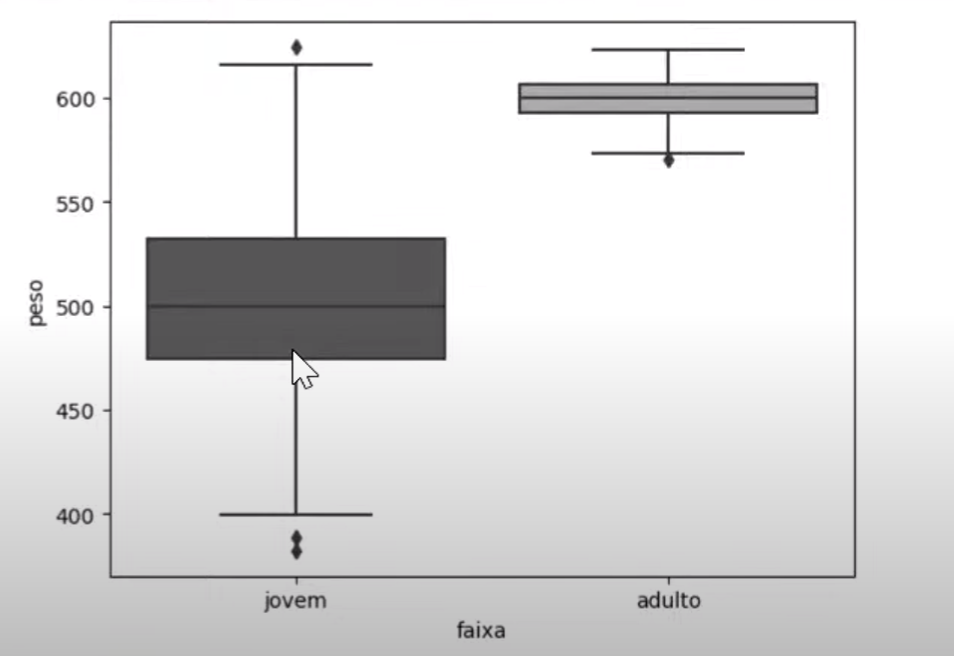

In [50]:
Image('./imagens_read/exemplo_vaca_1.png')

**Estrutura e estratégias dos testes**

Saber se a vaca é jovem ou adulta da um poder maior no momento de chutar e advinhar o peso do animal.

    --> A variável categorica idade é importante se eu precisar fazer um teste com a variável peso do animal. 

    --> Boxplot é uma boa ferramenta para esses casos.

Até o momente realizamos teste de normalidade e homogeneidade de variaveis. 

    --> Esses testes são pré-requisitos para decidir ou não sobre realizar um testes parametricos ou não. 

Testes de comparação de médias 

    -->  Site azul e site vermelho

    --> Roda o teste com publicos diferentes (amostras independentes) e compara as médias dos resultados da métrica de interesse. (acessos, vendas, tempo de permanencia na página e etc)


Teste de compração de médias dos pesos das vacas 

    --> Azul é jovem e o vermelho é o adulto

    --> Se fizer o teste de comparação de médias vai dar diferente

    --> ser azul ou ser vermelho no caso das vacas tem diferenças nos resultados

    --> Primeira coisa é validar se as vacas azul e vermelha seguem a distribuição normal 
    
        --> stats.kstest(x['variavel'].loc[x['categoria'==grupo_A],'norm')  / stats.kstest(x['variavel'].loc[x['categoria'==grupo_B],'norm')
    
        --> stats.shapiro(x['variavel'].loc[x['categoria'==grupo_A]) / stats.shapiro(x['variavel'].loc[x['categoria'==grupo_B])

    --> Depois que validou a normalidade

    --> Faço o teste para saber se as variâncias são iguais ou diferentes

        --> stats.levene( x['variavel'].loc[x['categoria'==grupo_A], x['variavel'].loc[x['categoria'==grupo_B] )

    --> No momento do teste t preciso declarar se a variancia é igual ou diferente para poder utilizar o teste correto para comparar as médias dos pesos dos grupos.

Existe o teste de uma amostra e o teste de duas amostras

    --> Uma amostra são os casos de olhar a para média e calcular a significancia estatistica dos resultados

    --> teste de duas amostras é o teste A/B

Existes os testes de duas amostras independentes e os emparelhados

    --> Indepedentes são as pessoas dos grupo azul não são as mesmas do grupo vermelho --> teste t para duas amostras indepedentes

    --> Se eu aplicar um teste em alunos antes do inicio do curso e outro com os mesmos alunos no final do curso. Os alunos são os mesmos então é um teste emparelhado --> amostras não são independentes.

Contexto de negocio  que vai determinar se independente e ou emparelhado.




### Teste t para uma amostra

Verifica se a média populacional ( $\mu$ ) é igual a um determinado valor $\mu_{0}$  

Teste t para uma amostra: 

$\mu_{0}$ = valor constante de interesse

$\mu_{0}$ = 18

Teste de uma amostra

H0: $\mu$ = 10

H1: $\mu \neq 10 $

H1 --> pode ser diferente , maior ou menor que  --> regra de negocio vai definir

#### Exemplo

Para realizar o teste, criei uma variável aleatória chamada amostra, conforme uma distribuição normal ( ou seja não preciso validar que é normal). 

Amostra

    --> média = 18 

    --> desvio padrão  = 4

    --> tamanho da amostra  = 1000

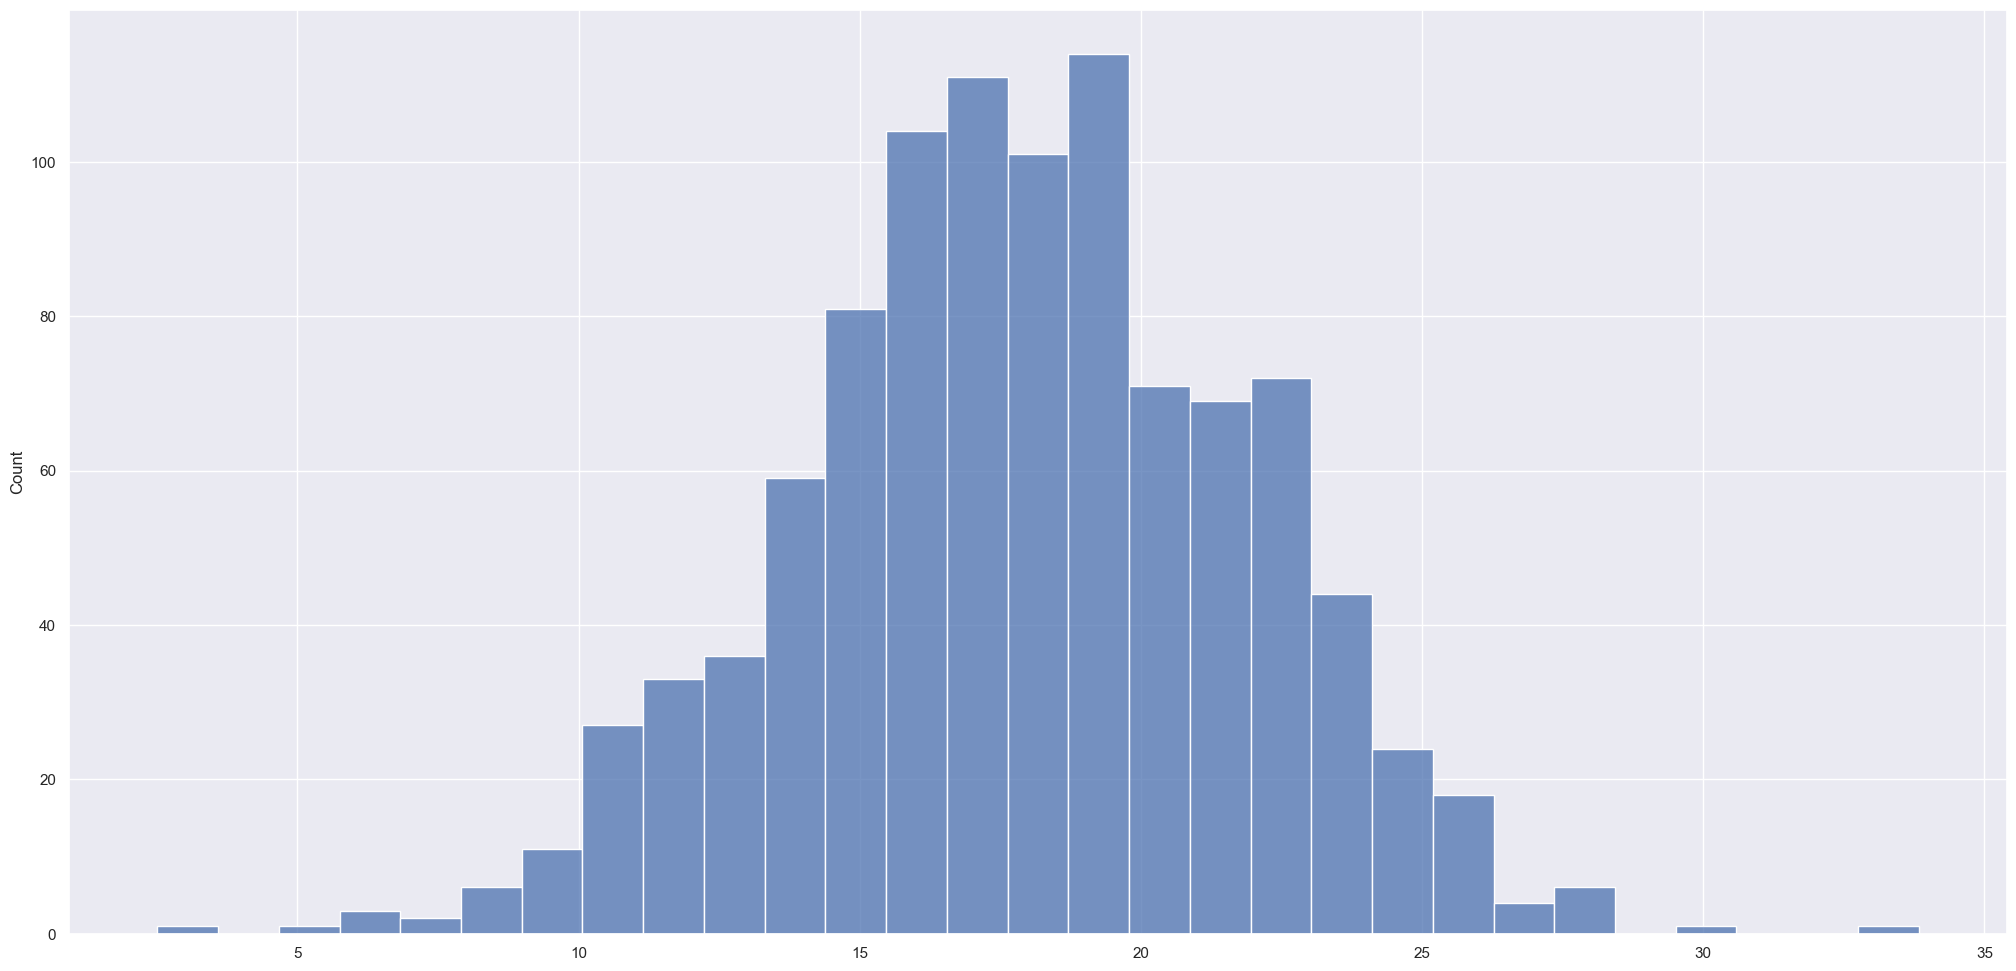

In [51]:
amostra = np.random.normal(18, 4, size = 1000)

sns.histplot(data = amostra);

Aplique os seguintes testes: 

**1 - Duas caudas --> quero testar se a média da amostra é igual a 10 ou diferente**

* H0: $\mu = 10$

* H1: $\mu \neq 10$


In [52]:
# ttest_1samp(a, popmean, axis=0, nan_policy='propagate', alternative='two-sided', *, keepdims=False)

# Calculate the T-test for the mean of ONE group of scores.

# This is a test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

# a --> amostra

# popmean

# nan_policy 

# alternative: Defines the alternative hypothesis. The following options are available (default is ‘two-sided’):

# --> ‘two-sided’: the mean of the underlying distribution of the sample is different than the given population mean (popmean)

# --> ‘less’: the mean of the underlying distribution of the sample is less than the given population mean (popmean)

# --> ‘greater’: the mean of the underlying distribution of the sample is greater than the given population mean (popmean)

stats.ttest_1samp(amostra, 10) 

TtestResult(statistic=62.654655518582, pvalue=0.0, df=999)

<font color = 'red'>**pvalue < 0.05 --> Rejeito H0**</f>

    --> Rejeito H0, Logo tenho evidencias que a média da amostra poderia ser diferente que 10. 
    
    --> Posso afirmar que a média da população da amostra não é 10 com um nível de confiança de 95%. 

    --> Porém não sei em qual das caudas o provavel valor da média da amostra se encontra.

**2 - Uma caudas --> quero testar se a média da amostra é igual a 10 ou menor que 10**

* H0: $\mu = 10$

* H1: $\mu < 10$

In [53]:
stats.ttest_1samp(amostra, 10, alternative = 'less')

TtestResult(statistic=62.654655518582, pvalue=1.0, df=999)

<font color = 'blue'>**pvalue > 0.05--> Não Rejeito H0**</f>

--> Não tenho evidencias que a média da amostra poderia ser menor que 10.

--> Não é uma pergunta interessante dado que eu sei que a média 18. 

--> Sempre fazer a EDA da amostra para que possamos fazer perguntas corretas no momento de fazer o teste.

**3 - Uma caudas --> quero testar se a média da amostra é igual a 10 ou maior que 10**

* H0: $\mu = 10$

* H1: $\mu > 10$

In [54]:
stats.ttest_1samp(amostra, 10, alternative = 'greater')

TtestResult(statistic=62.654655518582, pvalue=0.0, df=999)

<font color = 'red'>**pvalue < 0.05 --> Rejeito H0**</f>

--> Logo tenho evidências que a média da amostra poderia ser maior que 10.

--> Como o teste é de uma cauda posso afirmar que a média da população da amostra é maior que 10 com um nível de confiança de 95%.

#### Teste t para duas amostras

Verifica se a média populacional $\mu$ de um determinado grupo (amostra) é diferente, maior ou menor que de outro grupo (amostra): 

Teste t para duas amostras:

* H0: $\mu{A} = \mu{B}$

* H1: $\mu{A} \neq \mu{B}$

Lembrando que a hipótese alternativa H1 pode ser maior ou menor também.

Importante validar a noramlidade e escolher o teste t correto (variâncias iguais ou diferentes)

In [55]:
# stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0, *, keepdims=False)

    # a: Os arrays devem ter o mesmo formato, exceto na dimensão correspondente ao eixo (o primeiro, por padrão). 
    # b: Os arrays devem ter o mesmo formato, exceto na dimensão correspondente ao eixo (o primeiro, por padrão).
    # axis=0:
    # equal_var=True: Se Verdadeiro (padrão), execute um teste padrão independente de 2 amostras que assume variâncias populacionais iguais [1]. Se Falso, execute o teste t de Welch, que não assume variância populacional igual [2].
    # nan_policy='propagate': Se um NaN estiver presente na fatia do eixo (por exemplo, linha) ao longo da qual a estatística é computada, a entrada correspondente da saída será NaN.
    # permutations=None: Se 0 ou Nenhum (padrão), use a distribuição t para calcular valores p. Caso contrário, permutations é o número de permutações aleatórias que serão usadas para estimar valores p usando um teste de permutação. Se permutations for igual ou exceder o número de partições distintas dos dados agrupados, um teste exato será executado em vez disso (ou seja, cada partição distinta é usada exatamente uma vez). Veja Notas para detalhes.
    # random_state=None: Se seed for None (ou np.random), o singleton numpy.random.RandomState será usado. Se seed for um int, uma nova instância RandomState será usada, semeada com seed. Estado do gerador de números pseudoaleatórios usado para gerar permutações (usado somente quando permutations não for None).
    # alternative='two-sided':
    # trim=0:
    # *:
    # keepdims=False:

**Médico fez novo medicamento de emagrecimento**

    --> Pesou uma amostra de pessoas antes e depois de tomar o remédio e comparou as médias.

    --> teste emparelhado --> as mesmas pessoas foram pesadas antes e depois

**Vacas jovens e vacas adultas**

    --> Pesou uma amostra de vacas jovens e outra amostra de vacas adultas comparou as médias.
    
    --> teste t indepedente --> São vacas diferentes


**Procedimento para teste t de comparação de médias para duas amostras**

    --> 1º garantir que as duas amostras seguem a distribuição normal --> fazer teste de normalidade

    --> 2º Preciso saber se as variâncias das amostras são iguais ou diferentes --> fazer teste de análise de variância nas amostras

    --> 3º Escolher o teste t correto 
    
        --> Respeitanto o pressuposto de normalidade vou escolher o teste t correto de acordo se a variância é igual ou se a variância é diferente

        --> A escolha do teste t também deve observar se o teste será independente ou emparelhado de acordo com a regra de negocio/experimento